In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


usd = pd.read_csv("guncel-eth-usd.csv",index_col=0,parse_dates=True)
eth = pd.read_csv("US Dollar Index Futures Historical Data.csv",index_col=0,parse_dates=True)

# Setting Our Data Sets

In [52]:
usd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2021-12-31,3713.430176,3807.288818,3636.869873,3682.632813,3682.632813,14157285268
2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466
2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548


In [53]:
usd.drop(usd.columns[[0,1,2,4]],axis=1,inplace=True)
usd

,Close,Volume
Date,,
2017-11-09,320.884003,893249984
2017-11-10,299.252991,885985984
2017-11-11,314.681000,842300992
2017-11-12,307.907990,1613479936
2017-11-13,316.716003,1041889984
...,...,...
2021-12-31,3682.632813,14157285268
2022-01-01,3769.697021,9776191466
2022-01-02,3829.564941,9881471548


In [54]:
eth

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-01-04,96.233,96.180,96.470,96.035,-,0.02%
2022-01-03,96.211,95.600,96.330,95.600,16.79K,0.65%
2021-12-31,95.593,95.965,96.105,95.575,15.00K,-0.39%
2021-12-30,95.964,95.875,96.225,95.865,12.40K,0.04%
2021-12-29,95.926,96.135,96.395,95.735,16.54K,-0.29%
...,...,...,...,...,...,...
2017-01-10,101.996,101.850,102.090,101.485,33.33K,0.09%
2017-01-09,101.909,102.245,102.490,101.845,31.02K,-0.29%
2017-01-06,102.209,101.540,102.300,101.395,38.07K,0.67%


In [55]:
eth.drop(eth.columns[[1,2,3,4,5]],axis=1,inplace=True)
eth

,Price
Date,
2022-01-04,96.233
2022-01-03,96.211
2021-12-31,95.593
2021-12-30,95.964
2021-12-29,95.926
...,...
2017-01-10,101.996
2017-01-09,101.909
2017-01-06,102.209


In [56]:
#Checking shapes
print(usd.shape)
print(eth.shape)

(1518, 2)
(1292, 1)


# Table Concatenation

In [57]:
data=eth.join(usd,how='left')

In [58]:
data

,Price,Close,Volume
Date,,,
2022-01-04,96.233,3856.072510,1.359951e+10
2022-01-03,96.211,3761.380371,1.208078e+10
2021-12-31,95.593,3682.632813,1.415729e+10
2021-12-30,95.964,3713.852051,1.292538e+10
2021-12-29,95.926,3628.531738,1.572256e+10
...,...,...,...
2017-01-10,101.996,NaN,NaN
2017-01-09,101.909,NaN,NaN
2017-01-06,102.209,NaN,NaN


In [61]:
data.dropna(inplace=True)

In [62]:
data.tail()

,Price,Close,Volume
Date,,,
2017-11-15,93.726,333.356995,7.226660e+08
2017-11-14,93.723,337.631012,1.069680e+09
2017-11-13,94.388,316.716003,1.041890e+09
2017-11-10,94.278,299.252991,8.859860e+08
2017-11-09,94.352,320.884003,8.932500e+08


In [63]:
data

,Price,Close,Volume
Date,,,
2022-01-04,96.233,3856.072510,1.359951e+10
2022-01-03,96.211,3761.380371,1.208078e+10
2021-12-31,95.593,3682.632813,1.415729e+10
2021-12-30,95.964,3713.852051,1.292538e+10
2021-12-29,95.926,3628.531738,1.572256e+10
...,...,...,...
2017-11-15,93.726,333.356995,7.226660e+08
2017-11-14,93.723,337.631012,1.069680e+09
2017-11-13,94.388,316.716003,1.041890e+09


# Data Visualization

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

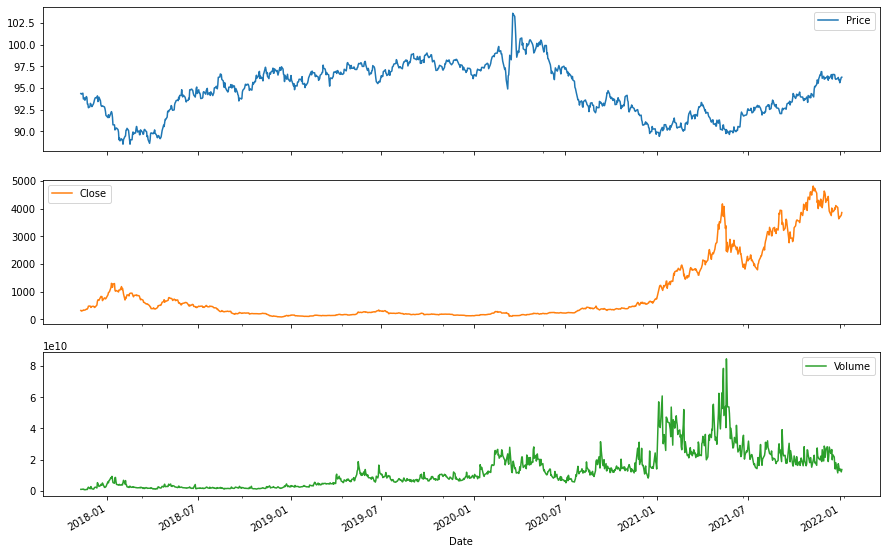

In [64]:
data.plot(subplots=True  ,figsize=(15,10))

In [65]:
y=data[["Close"]]
data

,Price,Close,Volume
Date,,,
2022-01-04,96.233,3856.072510,1.359951e+10
2022-01-03,96.211,3761.380371,1.208078e+10
2021-12-31,95.593,3682.632813,1.415729e+10
2021-12-30,95.964,3713.852051,1.292538e+10
2021-12-29,95.926,3628.531738,1.572256e+10
...,...,...,...
2017-11-15,93.726,333.356995,7.226660e+08
2017-11-14,93.723,337.631012,1.069680e+09
2017-11-13,94.388,316.716003,1.041890e+09


In [66]:
y['Close']

Date
2022-01-04    3856.072510
2022-01-03    3761.380371
2021-12-31    3682.632813
2021-12-30    3713.852051
2021-12-29    3628.531738
                 ...     
2017-11-15     333.356995
2017-11-14     337.631012
2017-11-13     316.716003
2017-11-10     299.252991
2017-11-09     320.884003
Name: Close, Length: 1072, dtype: float64

In [67]:
x=data[["Volume"]]

In [68]:
x

,Volume
Date,
2022-01-04,1.359951e+10
2022-01-03,1.208078e+10
2021-12-31,1.415729e+10
2021-12-30,1.292538e+10
2021-12-29,1.572256e+10
...,...
2017-11-15,7.226660e+08
2017-11-14,1.069680e+09
2017-11-13,1.041890e+09


# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.values,y.values)
y.values.size

1072

In [70]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
X=x.values
predict = lr.predict(x.values)
predict

array([[ 975.47896643],
       [ 886.76213633],
       [1008.06140108],
       ...,
       [ 241.9250396 ],
       [ 232.81790095],
       [ 233.24222781]])

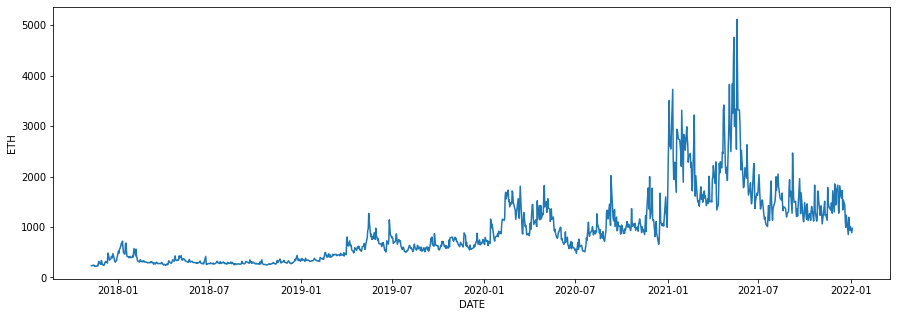

In [71]:
plt.figure(figsize=(15,5))
plt.plot(data.index,predict)
plt.ylabel('ETH')
plt.xlabel('DATE')
plt.show()

<AxesSubplot:xlabel='Date'>

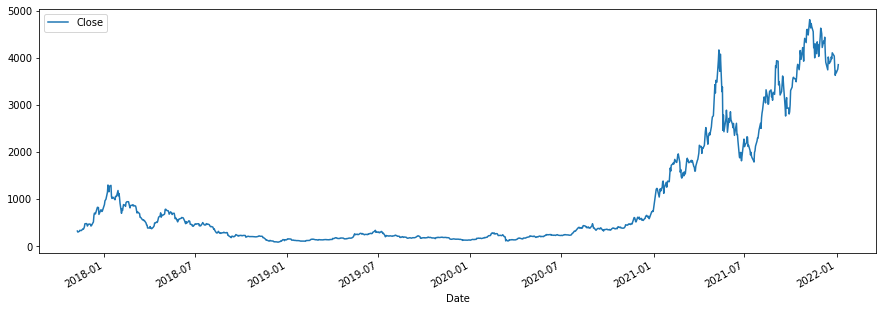

In [72]:
y.plot(figsize=(15,5))

# R2 Score

In [73]:
from sklearn.metrics import r2_score
r2_score(y,predict)

0.34748677367932923

# Polinomal Regression Using ETH Volume

In [75]:
data

,Price,Close,Volume
Date,,,
2022-01-04,96.233,3856.072510,1.359951e+10
2022-01-03,96.211,3761.380371,1.208078e+10
2021-12-31,95.593,3682.632813,1.415729e+10
2021-12-30,95.964,3713.852051,1.292538e+10
2021-12-29,95.926,3628.531738,1.572256e+10
...,...,...,...
2017-11-15,93.726,333.356995,7.226660e+08
2017-11-14,93.723,337.631012,1.069680e+09
2017-11-13,94.388,316.716003,1.041890e+09


In [76]:
y=data.iloc[:,0:1]
x=data.iloc[:,1:2]
x

,Close
Date,
2022-01-04,3856.072510
2022-01-03,3761.380371
2021-12-31,3682.632813
2021-12-30,3713.852051
2021-12-29,3628.531738
...,...
2017-11-15,333.356995
2017-11-14,337.631012
2017-11-13,316.716003


In [77]:
X=x.values
Y=y.values
X

array([[3856.07251 ],
       [3761.380371],
       [3682.632813],
       ...,
       [ 316.716003],
       [ 299.252991],
       [ 320.884003]])

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)

[[1.00000000e+00 3.85607251e+03 1.48692952e+07]
 [1.00000000e+00 3.76138037e+03 1.41479823e+07]
 [1.00000000e+00 3.68263281e+03 1.35617844e+07]
 ...
 [1.00000000e+00 3.16716003e+02 1.00309027e+05]
 [1.00000000e+00 2.99252991e+02 8.95523526e+04]
 [1.00000000e+00 3.20884003e+02 1.02966543e+05]]


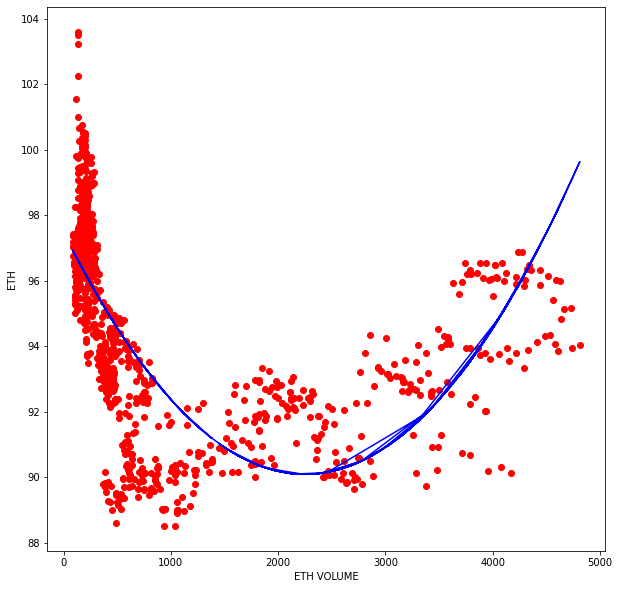

In [79]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.figure(figsize=(10,10))
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('ETH VOLUME')
plt.ylabel('ETH')
plt.show()

# R2 Score

In [80]:
r2_score(y,lin_reg2.predict(poly_reg.fit_transform(X)))

0.5328348596958958

# Test the Predictor 

In [82]:
# Our predictor saying when the volume is '8.44829128e+10' ETH will be '4464.73406298'



print(lin_reg2.predict(poly_reg.fit_transform([[8.44829128e+10]])))


[[1.04062477e+16]]


# Polinomal Regression Using Dolar Price

In [83]:
x=data.iloc[:,0:1]
y=data.iloc[:,2:3]
X=x.values
Y=y.values

In [84]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X)

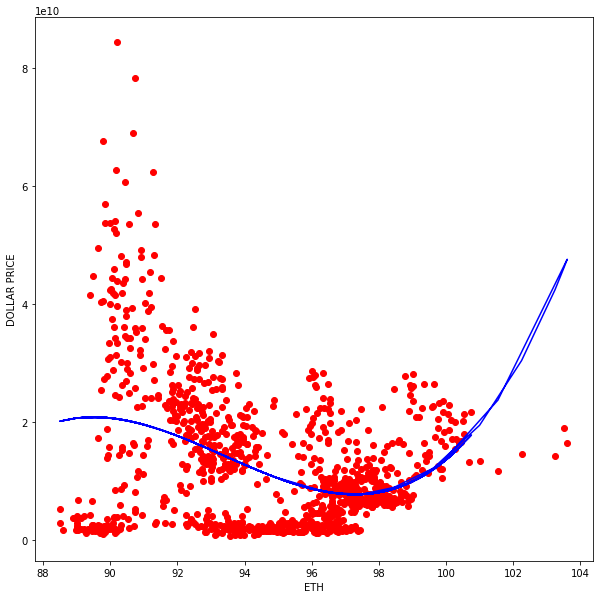

In [85]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.figure(figsize=(10,10))
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('ETH')
plt.ylabel('DOLLAR PRICE')
plt.show()

# R2 Score

In [86]:
r2_score(y,lin_reg2.predict(poly_reg.fit_transform(X)))

0.17539719239440998

# Test the predictor using ETH

In [88]:
# Our predictor saying when the ETH is '4500' usd dollar price will be '85.31'



print(lin_reg2.predict(poly_reg.fit_transform([[4500]])))


[[4.76523251e+18]]


# Standardization and SVR

In [89]:
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_st = sc1.fit_transform(X)

y_st = np.ravel(sc1.fit_transform(Y.reshape(-1,1)))
Y

array([[1.35995105e+10],
       [1.20807779e+10],
       [1.41572853e+10],
       ...,
       [1.04188998e+09],
       [8.85985984e+08],
       [8.93249984e+08]])

Text(0, 0.5, 'DOLLAR PRICE')

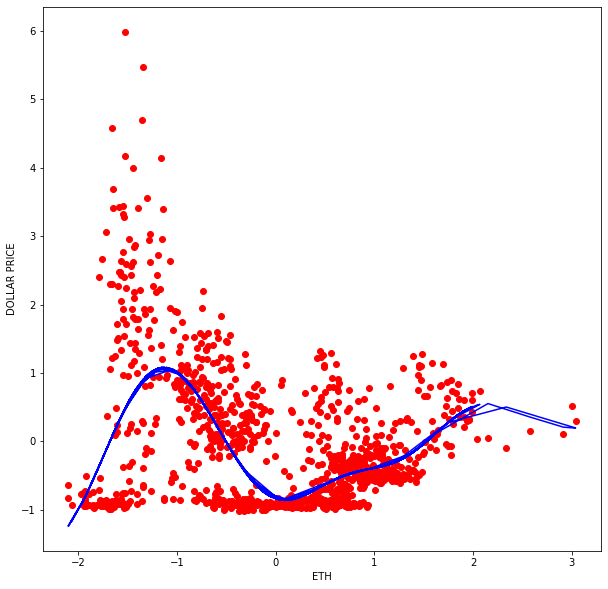

In [90]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_st,y_st)
plt.figure(figsize=(10,10))
plt.scatter(x_st,y_st,color='red')
plt.plot(x_st,svr_reg.predict(x_st),color='blue')
plt.xlabel('ETH')
plt.ylabel('DOLLAR PRICE')



# R2 Score

In [91]:
r2_score(y_st,svr_reg.predict(x_st))

0.2852451578856703